# Постановка задачі

Створити програму, яка б для заданого часового ряду дозволяла: 
1.	Відобразити ряд динаміки графічно.
2.	Виконати попередній аналіз даних, дослідивши наявність відсутніх та аномальних значень.
3.	Перевірити ряд на випадковість (згідно з індивідуальним завданням):
    -	 Метод знаків.
4.	Реалізувати методи(згідно з індивідуальним завданням):
    -	 Метод Спірмена.
5.	Побудувати корелограму, на базі якої зробити висновок про наявність сезонної складової та тренду.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import math

In [2]:
# Завантаження і фільтрація даних (1-й магазин)

df = pd.read_csv('data/train.csv', sep=',')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Store'] == 1]
df = df[df['Open'] == 1]
df.reset_index(drop=True, inplace=True)
display(df)

d:\Program files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,1,4,2015-07-30,5020,546,1,1,0,1
2,1,3,2015-07-29,4782,523,1,1,0,1
3,1,2,2015-07-28,5011,560,1,1,0,1
4,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
776,1,1,2013-01-07,7176,785,1,1,0,1
777,1,6,2013-01-05,4997,635,1,0,0,1
778,1,5,2013-01-04,4486,619,1,0,0,1
779,1,4,2013-01-03,4327,578,1,0,0,1


In [3]:
# Перевірка на пропуски

missing_values = df.isnull().sum()
print("Пропущені значення:")
print(missing_values)

Пропущені значення:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


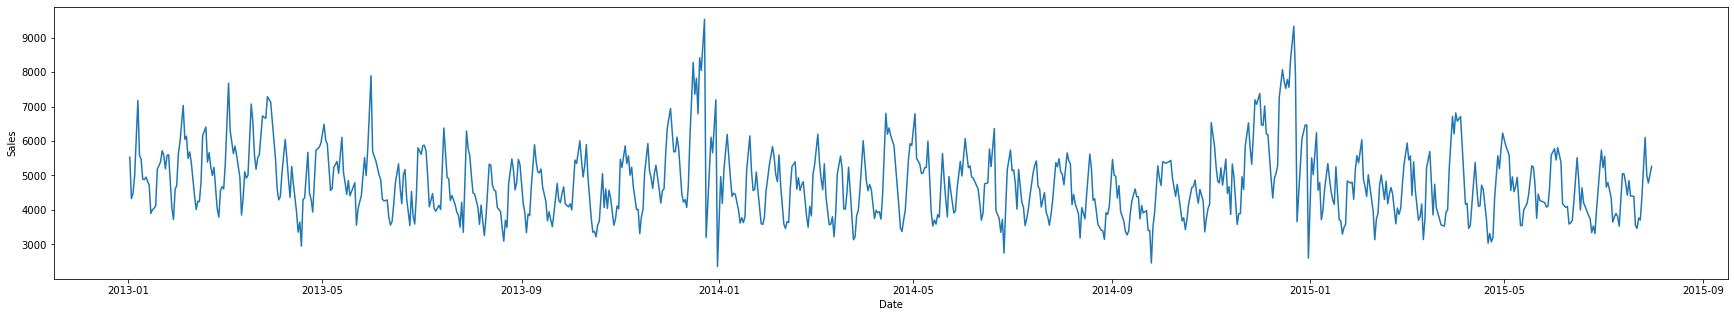

In [4]:
# Графічне відображення часового ряду

plt.figure(figsize=(30,5))
plt.plot(df['Date'], df['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [5]:
# Перевірка на випадковість методом знаків

def sign_method(df) :
    N = len(df)

    C = 0

    for i in range(N - 1) :
        if df['Sales'][i] < df['Sales'][i + 1] :
            C = C + 1

    M_C = (N - 1) / 2

    D_C = (N + 1) / 12

    K = (C - M_C) / math.sqrt(D_C)

    print(N, C, M_C, D_C, K)

    alpha = 0.05

    condition1 = abs(K) <= ss.norm.ppf(alpha/2)
    condition2 = K < -ss.norm.ppf(alpha/2)
    condition3 = K > ss.norm.ppf(alpha/2)

    table = pd.DataFrame(columns={"Гіпотеза" : 1, "Значення": 2, "Висновок": 3})
    table.loc[len(table)] = ["H0", condition1, "Ряд випадковий" if condition1 else "Гіпотеза про випадковість ряду не приймається"]
    table.loc[len(table)] = ["H1", condition2, "Тенденція ряду до спадання" if condition2 else "Гіпотеза про тенденцію ряду до спадання не приймається"]
    table.loc[len(table)] = ["H2", condition3, "Тенденція ряду до зростання" if condition3 else "Гіпотеза про тенденцію ряду до зростання не приймається"]
    display(table.style.hide_index()) 

sign_method(df)

781 409 390.0 65.16666666666667 2.353644396193702


Гіпотеза,Значення,Висновок
H0,False,Гіпотеза про випадковість ряду не приймається
H1,False,Гіпотеза про тенденцію ряду до спадання не приймається
H2,True,Тенденція ряду до зростання


In [6]:
# Метод Спірмена

def spearman_method(df) :
    N = len(df)
    V = 0

    for i in range(N - 1) :
        for j in range(i + 1, N) :
            h = 0.0
            
            if df['Sales'][i] < df['Sales'][j] :
                h = 1.0
            elif df['Sales'][i] == df['Sales'][j] :
                h = 0.5
            else:
                h = 0.0

            V = V + (j - i) * h
    
    tau = 1 - (12 * V) / (N * (N ** 2 - 1))
    D = 1 / (N - 1)
    S = tau / math.sqrt(D)
    alpha = 0.05
    print(S)

    condition1 = abs(S) <= ss.norm.ppf(alpha/2)
    condition2 = S < -ss.norm.ppf(alpha/2)
    condition3 = S > ss.norm.ppf(alpha/2)

    table = pd.DataFrame(columns={"Гіпотеза" : 1, "Значення": 2, "Висновок": 3})
    table.loc[len(table)] = ["H0", condition1, "Ряд випадковий" if condition1 else "Гіпотеза про випадковість ряду не приймається"]
    table.loc[len(table)] = ["H1", condition2, "Тенденція ряду до зростання" if condition2 else "Гіпотеза про тенденцію ряду до зростання не приймається"]
    table.loc[len(table)] = ["H1", condition3, "Тенденція ряду до спадання" if condition3 else "Гіпотеза про тенденцію ряду до спадання не приймається"]
    display(table.style.hide_index()) 

spearman_method(df)

-3.894900095243458


Гіпотеза,Значення,Висновок
H0,False,Гіпотеза про випадковість ряду не приймається
H1,True,Тенденція ряду до зростання
H1,False,Гіпотеза про тенденцію ряду до спадання не приймається


In [7]:
# Критерій випадковості, що ґрунтується на серіальній кореляції

from statsmodels.tsa.stattools import acf

def get_corelation_coef(df) :
    alpha = 0.05
    lags = 50
    N = len(df['Sales'])

    values, intervals = acf(df['Sales'], fft=True, alpha=alpha, nlags = lags)

    table = pd.DataFrame(columns={"Лаг" : 1, "Коефіцієнт": 2, "Статистика": 3, "Висновок": 4})

    quantile = ss.t.ppf(1-alpha/2, N - lags - 2)

    for i in range(1, lags):
        t = (values[i] * math.sqrt(N - lags - 2)) / math.sqrt(1 - values[i] ** 2)

        conclusion = ""
        
        if abs(t) >= quantile : 
            conclusion = "Значущий"
        else : 
            conclusion = "Не значущий"
            
        table.loc[len(table)] = [i, values[i], t, conclusion]

    display(table.style.hide_index()) 

    return values

values = get_corelation_coef(df)

Лаг,Коефіцієнт,Статистика,Висновок
1,0.682329,25.200715,Значущий
2,0.480885,14.808560,Значущий
3,0.269510,7.556383,Значущий
4,0.198472,5.467520,Значущий
5,0.014606,0.394401,Не значущий
6,-0.030322,-0.819081,Не значущий
7,-0.056705,-1.533509,Не значущий
8,-0.008997,-0.242919,Не значущий
9,0.055213,1.493035,Не значущий
10,0.170903,4.683292,Значущий


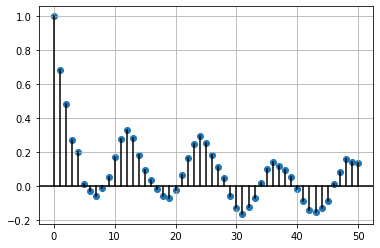

In [8]:
# Корелограма

def print_corelogram(values) :
    plt.scatter(range(len(values)), values)
    plt.axhline(0, color='black')
    plt.grid()
    
    for i in range(len(values)):
        plt.plot([i, i], [values[i], 0], 'black')
    plt.show()

print_corelogram(values)

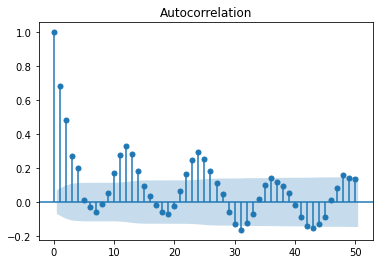

In [9]:
# Корелограма (вбудована)

from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(df["Sales"], lags=50)
plt.show()

# Висновки

На основі корелограми зроблено висновки про наявність сезонності з періодом 12 місяців і незначного тренду.